In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")

match_df = pd.read_csv("match_data.csv")
info_df = pd.read_csv("match_info_data.csv")

print(match_df.shape)
print(info_df.shape)

match_df.head()

/tmp/ipython-input-3010048920.py:7: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  match_df = pd.read_csv("match_data.csv")


(243817, 23)
(1024, 18)


,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed,other_wicket_type,other_player_dismissed,cricsheet_id
0,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.1,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
1,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.2,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
2,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.3,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
3,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.4,Gujarat Titans,Chennai Super Kings,Shubman Gill,WP Saha,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353
4,1370353,2023,2023-05-29,"Narendra Modi Stadium, Ahmedabad",1,0.5,Gujarat Titans,Chennai Super Kings,WP Saha,Shubman Gill,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1370353


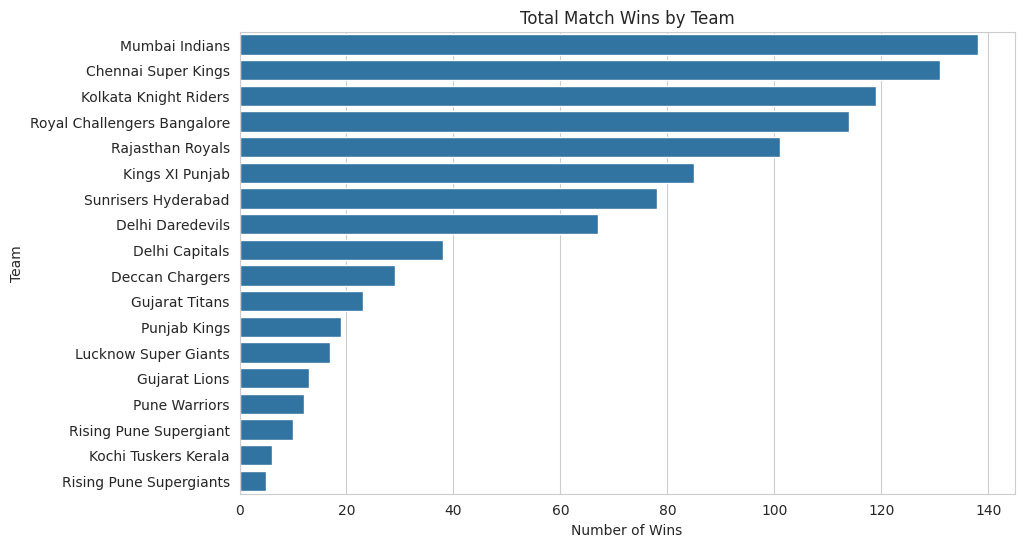

In [2]:
# Count match wins
winners = info_df['winner'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=winners.values, y=winners.index)
plt.title("Total Match Wins by Team")
plt.xlabel("Number of Wins")
plt.ylabel("Team")
plt.show()

In [3]:
match_df.columns

Index(['match_id', 'season', 'start_date', 'venue', 'innings', 'ball',
       'batting_team', 'bowling_team', 'striker', 'non_striker', 'bowler',
       'runs_off_bat', 'extras', 'wides', 'noballs', 'byes', 'legbyes',
       'penalty', 'wicket_type', 'player_dismissed', 'other_wicket_type',
       'other_player_dismissed', 'cricsheet_id'],
      dtype='object')

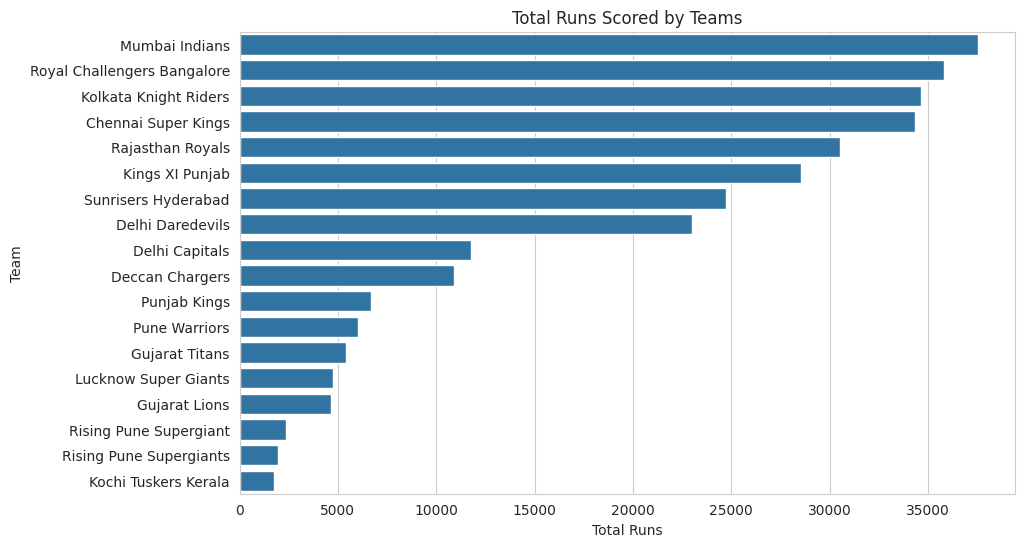

In [4]:
team_runs = match_df.groupby('batting_team')['runs_off_bat'].sum().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=team_runs.values, y=team_runs.index)
plt.title("Total Runs Scored by Teams")
plt.xlabel("Total Runs")
plt.ylabel("Team")
plt.show()

/tmp/ipython-input-762392673.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=team_runs.values, y=team_runs.index, palette="viridis")


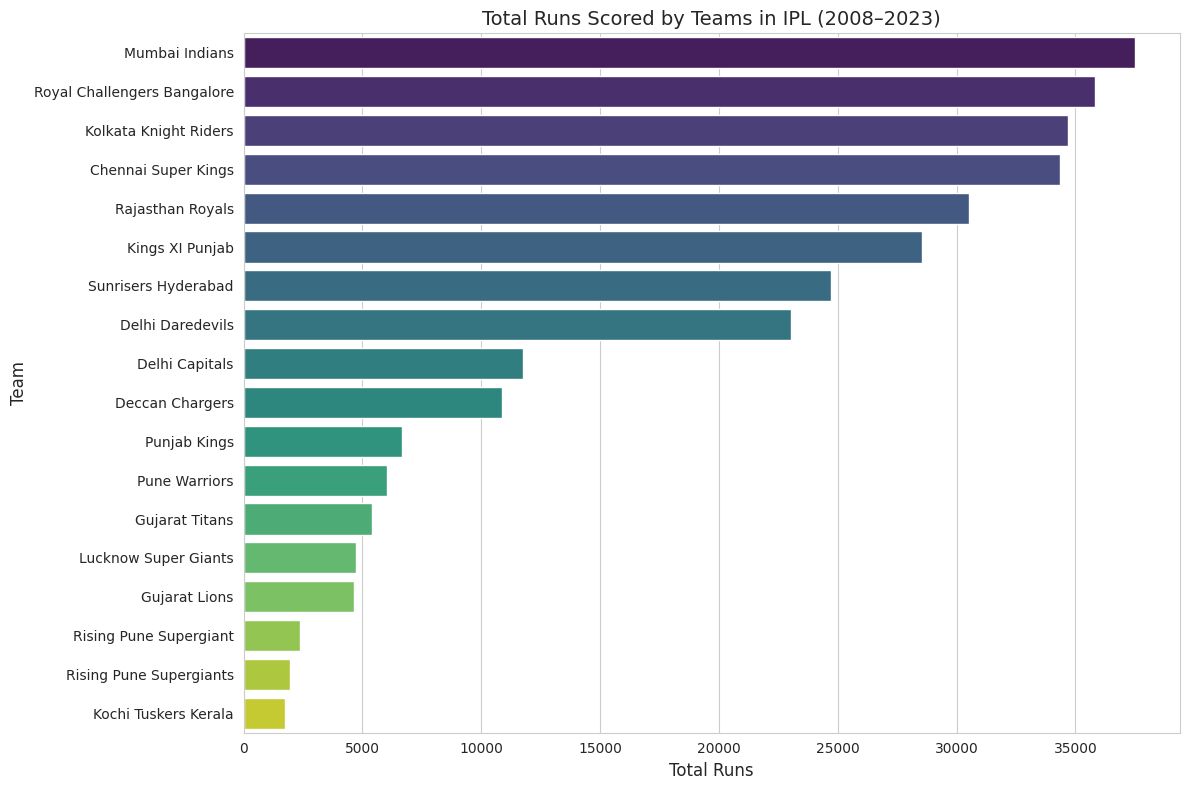

In [5]:
plt.figure(figsize=(12,8))
sns.barplot(x=team_runs.values, y=team_runs.index, palette="viridis")

plt.title("Total Runs Scored by Teams in IPL (2008–2023)", fontsize=14)
plt.xlabel("Total Runs", fontsize=12)
plt.ylabel("Team", fontsize=12)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1272536251.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="magma")


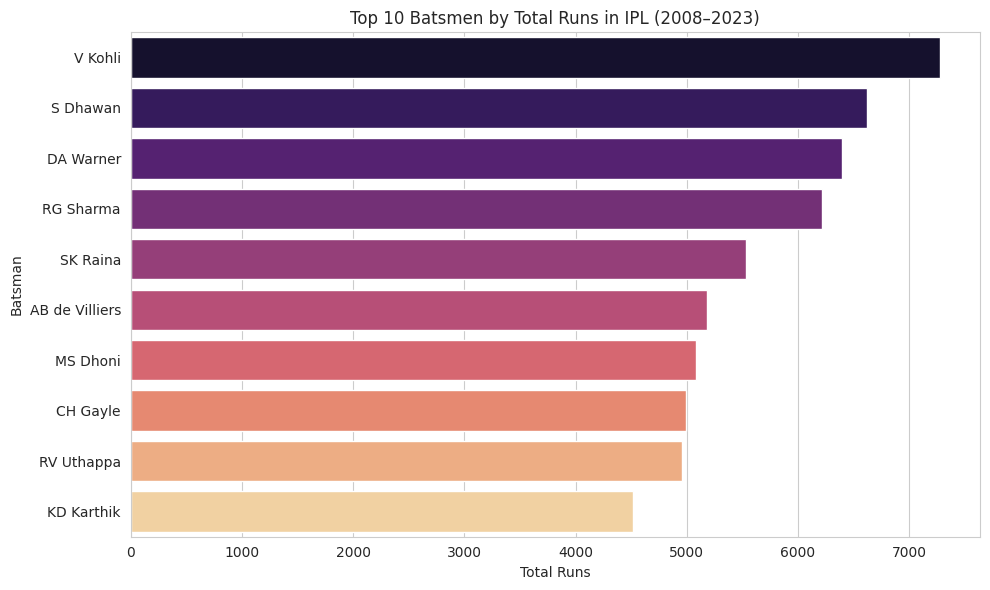

In [6]:
top_batsmen = match_df.groupby('striker')['runs_off_bat'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_batsmen.values, y=top_batsmen.index, palette="magma")

plt.title("Top 10 Batsmen by Total Runs in IPL (2008–2023)")
plt.xlabel("Total Runs")
plt.ylabel("Batsman")

plt.tight_layout()
plt.show()

In [7]:
match_info_df = pd.read_csv("match_info_data.csv")
match_info_df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1370353,2023,Ahmedabad,2023/05/29,Gujarat Titans,Chennai Super Kings,Chennai Super Kings,field,D/L,1,Chennai Super Kings,0,5,DP Conway,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,KN Ananthapadmanabhan
1,1370352,2023,Ahmedabad,2023/05/26,Gujarat Titans,Mumbai Indians,Mumbai Indians,field,normal,0,Gujarat Titans,62,0,Shubman Gill,"Narendra Modi Stadium, Ahmedabad",Nitin Menon,RJ Tucker,J Madanagopal
2,1370351,2023,Chennai,2023/05/24,Mumbai Indians,Lucknow Super Giants,Mumbai Indians,bat,normal,0,Mumbai Indians,81,0,Akash Madhwal,"MA Chidambaram Stadium, Chepauk, Chennai",BNJ Oxenford,VK Sharma,CB Gaffaney
3,1370350,2023,Chennai,2023/05/23,Chennai Super Kings,Gujarat Titans,Gujarat Titans,field,normal,0,Chennai Super Kings,15,0,RD Gaikwad,"MA Chidambaram Stadium, Chepauk, Chennai",AK Chaudhary,CB Gaffaney,BNJ Oxenford
4,1359543,2023,Mumbai,2023/05/21,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,8,C Green,"Wankhede Stadium, Mumbai",KN Ananthapadmanabhan,RJ Tucker,R Pandit


/tmp/ipython-input-590640934.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_win_count.index, y=toss_win_count.values, palette="coolwarm")


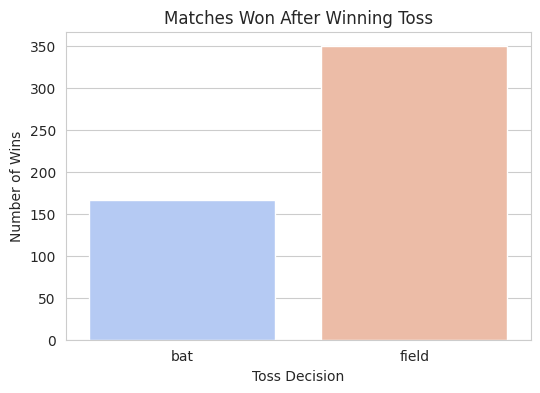

In [8]:
toss_win = match_info_df[match_info_df['toss_winner'] == match_info_df['winner']]
toss_win_count = toss_win.groupby('toss_decision').size()

plt.figure(figsize=(6,4))
sns.barplot(x=toss_win_count.index, y=toss_win_count.values, palette="coolwarm")

plt.title("Matches Won After Winning Toss")
plt.xlabel("Toss Decision")
plt.ylabel("Number of Wins")

plt.show()